In [6]:
import pandas as pd
import numpy as np

In [2]:
boxes=pd.read_csv('../boxes/boxes_GS_1x1_eNATL60.csv',sep = '\t',index_col=0)

In [3]:
    imin=boxes['imin']
    imax=boxes['imax']
    jmin=boxes['jmin']
    jmax=boxes['jmax']


In [12]:
    lonmin=boxes['lonmin']
    lonmax=boxes['lonmax']
    latmin=boxes['latmin']
    latmax=boxes['latmax']


In [19]:
box_name=boxes.index

In [4]:
imin.shape

(110,)

In [13]:
print(np.min(lonmin))

-70.16946411132811


In [8]:
print(np.max(imax))

2274


In [9]:
print(np.min(jmin))

1748


In [10]:
print(np.max(jmax))

2347


In [11]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import pandas as pd
import time


In [14]:
def plot_individual_box(box_pd,i,ax=None):
    x1 = box_pd['lonmin'][box_name[i]]
    x2 = box_pd['lonmax'][box_name[i]]
    y1 = box_pd['latmin'][box_name[i]]
    y2 = box_pd['latmax'][box_name[i]]
    ax.plot([x1, x2], [y1, y1],**pltargs)
    ax.plot([x1, x2], [y2, y2],**pltargs)
    ax.plot([x1, x1], [y1, y2],**pltargs)
    ax.plot([x2, x2], [y1, y2],**pltargs)
    ax.text((x1+x2)/2-0.4,(y1+y2)/2-0.1,box_name[i])


(30, 45)

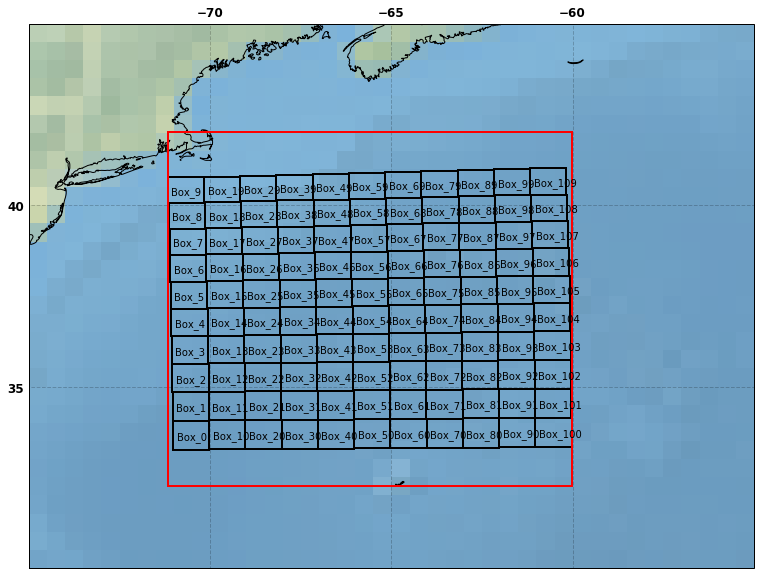

In [23]:
    transform = ccrs.PlateCarree()

    pltargs = {
   'transform' : transform,
   'color' : 'black',
   'linewidth' : 2}
    plt.figure(figsize=(15,10))
    proj = transform
    ax = plt.axes(projection=proj)
    ax.stock_img()
    for i in range(len(boxes.index)):
        plot_individual_box(boxes,i,ax=ax)
    ax.coastlines(resolution="10m")
    ax.plot([np.min(lonmin)-1, np.max(lonmax)+1], [np.min(latmin)-1, np.min(latmin)-1],color='red',linewidth= 2,transform= transform)
    ax.plot([np.min(lonmin)-1, np.max(lonmax)+1], [np.max(latmax)+1, np.max(latmax)+1],color='red',linewidth= 2,transform= transform)
    ax.plot([np.min(lonmin)-1, np.min(lonmin)-1], [np.min(latmin)-1, np.max(latmax)+1],color='red',linewidth= 2,transform= transform)
    ax.plot([np.max(lonmax)+1, np.max(lonmax)+1], [np.min(latmin)-1, np.max(latmax)+1],color='red',linewidth= 2,transform= transform)

    # grid lines
    gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,10,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(20,80,5,dtype=float))


    #ax.grid(False)
    plt.xlim((-75,-55))
    plt.ylim((30,45))


In [24]:
print(np.min(lonmin), np.max(lonmax))

-70.16946411132811 -61.02774047851562


In [25]:
print(np.min(latmin), np.max(latmax))

33.25783157348633 41.02639198303223
